In [1]:

# Import Libraries
import pandas as pd
import numpy as np
import os
from dask import dataframe as dd

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from dateutil.relativedelta import relativedelta

def ConvertDate(string):
    date = pd.to_datetime(string, format='%Y-%m-%d')
    return date

def displayDataFrame(df):
    with pd.option_context('display.max_columns', None):
        display(df)
    
def SummaryDataFrame(df, ConditionName):
    print('-----------------------------')
    print('\033[1m' + ConditionName.upper() + '\033[0m')
    print('\033[1m Columns: \033[0m')
    print(df.columns)
    print('\033[1m Size of dataset: \033[0m', df.shape)
    displayDataFrame(df.head(2))


In [2]:

# Open datasets with flagged errors
Datasets = ['Dementia', 'Autism', 'Diabetes']

def OpenFile(dataset):
    print('Reading', dataset, 'dataset...')
    Path = r"O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Data\1_Processed"
    FileName = dataset + '_SpellLevel_FeatureEngineered.csv'
    FilePath = os.path.join(Path, FileName)
    df_dataset = pd.read_csv(FilePath)
    
    return df_dataset

df_Dementia_ini = OpenFile('Dementia')
# df_Autism_ini = OpenFile('Autism')
# df_Diabetes_ini = OpenFile('Diabetes')

SummaryDataFrame(df_Dementia_ini, 'Dementia')
# SummaryDataFrame(df_Autism_ini, 'Autism')
# SummaryDataFrame(df_Diabetes_ini, 'Diabetes')


Reading Dementia dataset...
-----------------------------
DEMENTIA
 Columns: 
Index(['Unnamed: 0', 'P_Spell_ID', 'HESID', 'LSOA_2011_Code', 'Admission_date',
       'Discharge_date', 'EPIstart', 'EPIend', 'diagnosis_group', 'Spell_Los',
       'sex', 'age_of_patient', 'Ethnicity', 'IMD_Score', 'IMD_Decile',
       'HFRS_Score', 'HFRS_Band', 'ProvCode', 'Main_Specialty_Description',
       'POD', 'MORT', 'Read30', 'Read90', 'TimeDiff_FirstSpell', 'Region',
       'Missing_Age', 'Missing_IMD_Score', 'POD_Elective', 'POD_Emergency',
       'Missing_POD', 'ProvCode_PrivateProv', 'Spell_Los_0',
       'FirstSpell_P_Spell_ID', 'FirstSpell_Admission_date',
       'FirstSpell_Discharge_date', 'FirstSpell_ProvCode', 'FirstSpell_POD',
       'FirstSpell_Main_Specialty_Description', 'FirstSpell_Region',
       'FirstSpell_ProvCode_PrivateProv', 'Change_ProvCode', 'Change_Region',
       'Change_Main_Specialty_Description', 'Change_ProvCode_Type',
       'SpellLevel_ICD10', 'SpellLevel_ICD10_Demen

,Unnamed: 0,P_Spell_ID,HESID,LSOA_2011_Code,Admission_date,Discharge_date,EPIstart,EPIend,diagnosis_group,Spell_Los,sex,age_of_patient,Ethnicity,IMD_Score,IMD_Decile,HFRS_Score,HFRS_Band,ProvCode,Main_Specialty_Description,POD,MORT,Read30,Read90,TimeDiff_FirstSpell,Region,Missing_Age,Missing_IMD_Score,POD_Elective,POD_Emergency,Missing_POD,ProvCode_PrivateProv,Spell_Los_0,FirstSpell_P_Spell_ID,FirstSpell_Admission_date,FirstSpell_Discharge_date,FirstSpell_ProvCode,FirstSpell_POD,FirstSpell_Main_Specialty_Description,FirstSpell_Region,FirstSpell_ProvCode_PrivateProv,Change_ProvCode,Change_Region,Change_Main_Specialty_Description,Change_ProvCode_Type,SpellLevel_ICD10,SpellLevel_ICD10_Dementia,SpellLevel_ICD10_Parkinson,SpellLevel_ICD10_ParkinsonsDementia,SpellLevel_FirstDiagnosis,SubsequentSpell,SpellLevel_Error_Dementia
0,0,1421,00007773EC3BDCAF9441AFA32057315D,E01008446,2020-09-04,2020-09-18,2020-09-07,2020-09-18,G20X~F023~R410~R441~R630~D529~E559~I951~M549~G...,14,Male,81,not known,7.717,9.0,0.0,None,RTD,geriatric medicine,EM,0,NaN,NaN,-14.0,North East & Yorkshire,0,0,0,1,0,0,0,1421.0,2020-09-04,2020-09-18,RTD,EM,geriatric medicine,North East & Yorkshire,0,0,0,0,0,R410~E86X~R630~G20X~F067~G473~I679~D333~Z922~Z...,1,1,1,1,0,0
1,1,8786,0002CF863631188C9524321D4710EF31,E01021334,2014-07-03,2014-07-17,2014-07-12,2014-07-17,N390~U898~N182~G20XD~F023A~K590~R33X~R600~R680...,14,Female,88,white,14.370,6.0,0.0,None,RAJ,geriatric medicine,EM,0,NaN,NaN,-14.0,East of England,0,0,0,1,0,0,0,8786.0,2014-07-03,2014-07-17,RAJ,EM,geriatric medicine,East of England,0,0,0,0,0,N390~U898~N182~G20XD~F023A~K590~R33X~R600~R680...,1,1,1,1,0,0


# Prepare Features of Interest

## Prior analysis

In [224]:

# Analyse main specialties
df = df_Dementia_ini

List_Specialties = list(set(df.loc[:, 'Main_Specialty_Description'].values))
d = {}
for specialty in List_Specialties:
    Filter = (df.loc[:, 'Main_Specialty_Description'] == specialty)
    d[specialty] = df.loc[Filter, :].shape[0]

d_Counts = {'Main_Specialty_Description':d.keys(), 'Counts':d.values()}
df_Specialty = pd.DataFrame(data=d_Counts).sort_values(by=['Counts'], ascending=False)
df_Specialty.loc[:, 'Prop'] = 100 * df_Specialty.loc[:, 'Counts'] / (df_Specialty.loc[:, 'Counts'].sum())
displayDataFrame(df_Specialty.head())

# Parkinson's
Filter_Parkinson = df.loc[:, 'SpellLevel_ICD10_Parkinson'] == 1
Sum_NoParkinson = df.loc[~Filter_Parkinson, 'SpellLevel_Error_Dementia'].sum()
Sum_Parkinson = df.loc[Filter_Parkinson, 'SpellLevel_Error_Dementia'].sum()
Prop_NoParkinson = 100 * Sum_NoParkinson / (df.loc[~Filter_Parkinson, 'SpellLevel_Error_Dementia'].shape[0])
Prop_Parkinson = 100 * Sum_Parkinson / (df.loc[Filter_Parkinson, 'SpellLevel_Error_Dementia'].shape[0])
print('Proportion of errors in spells WITHOUT G20 code for Parkinson: %0.2f' % Prop_NoParkinson, '%')
print('Proportion of errors in spells WITH G20 code for Parkinson: %0.2f' % Prop_Parkinson, '%')


,Main_Specialty_Description,Counts,Prop
40,geriatric medicine,26590,28.790454
58,general medicine,20214,21.886809
25,accident & emergency,6777,7.337830
70,general surgery,3495,3.784229
19,trauma & orthopaedics,3442,3.726843


Proportion of errors in spells WITHOUT G20 code for Parkinson: 47.98 %
Proportion of errors in spells WITH G20 code for Parkinson: 16.64 %


In [812]:

# Processand Encode features
# --------------------------------------------------
def ProcessAndEncode(df_ini, ConditionName):
    df = df_ini.copy()
    ErrorName = 'SpellLevel_Error_'+ConditionName

    # Number of admission within 3 years
#     Filter_Admission3Years = df.loc[:, 'SpellLevel_TimeDiff']<=3*365
#     df_Read3Years = df.loc[Filter_Admission3Years, :].groupby(by=['HESID'])[['P_Spell_ID']].agg('count').reset_index()
#     df = pd.merge(df, df_Read3Years, on='HESID', how='left').rename(columns={'P_Spell_ID_x':'P_Spell_ID',
#                                                                              'P_Spell_ID_y':'Read3Years_SinceFirst'})
#     df.loc[:, 'Read3Years_SinceFirst'] = df.loc[:, 'Read3Years_SinceFirst']-1

    # Death within 3 years
#     Filter_Death3YearsSinceFirst = (df.loc[:, 'MORT']==1) & (df.loc[:, 'SpellLevel_TimeDiff']<=3*365)
#     df.loc[:, 'MORT3Years_SinceFirst'] = np.where(Filter_Death3YearsSinceFirst, 1, 0)
#     df.loc[:, 'MORT3Years_SinceFirst'] = df.groupby(by=['HESID'])['MORT3Years_SinceFirst'].transform('sum')

    # Number of errors per patient?
#     Filter_3YearFollowUp = (df.loc[:, 'SpellLevel_TimeDiff']<=3*365) & (df.loc[:, 'Admission_date']>df.loc[:, 'NewFirstSpell_Admission_date'])
#     df_FollowUp = df.loc[Filter_3YearFollowUp, :]
#     df_FollowUp.loc[:, 'NumberErrors_3YearsSinceFirst'] = df_FollowUp.groupby(by=['HESID'])['SpellLevel_Error_'+ConditionName].transform('sum')
#     df_FollowUp = df_FollowUp.drop_duplicates(subset=['HESID'], keep='first')
#     ColumnList = ['HESID', 'NumberErrors_3YearsSinceFirst']
#     df = pd.merge( df, df_FollowUp.loc[:, ColumnList], on='HESID', how='left' )
#     df.loc[:, 'NumberErrors_3YearsSinceFirst'] = df.loc[:, 'NumberErrors_3YearsSinceFirst'].fillna(0)
#     df.loc[:, 'PropErrors_3YearsSinceFirst'] = df.loc[:, 'NumberErrors_3YearsSinceFirst']/df.loc[:, 'Read3Years_SinceFirst']
#     df.loc[:, 'PropErrors_3YearsSinceFirst'] = df.loc[:, 'PropErrors_3YearsSinceFirst'].fillna(0)

    # Only keep readmissions (SpellLevel_TimeDiff>0)
    Filter_SubsequentSpell = (df.loc[:, 'SubsequentSpell']==1)
    df = df.loc[Filter_SubsequentSpell, :].drop(columns=['SubsequentSpell'])
    

    # Select Features
    ColumnList = ['sex', 'age_of_patient', 'Ethnicity',
                   'ProvCode', 'FirstSpell_ProvCode', 
                   'Main_Specialty_Description',
                   'Spell_Los', 'Spell_Los_0', 'MORT', 'Read30', 'Read90',
                   'POD_Emergency', # POD_Elective
                   'FirstSpell_ProvCode_PrivateProv', 'ProvCode_PrivateProv',
                   'Change_ProvCode', 'Change_ProvCode_Type', 'Change_Region', 'Change_Main_Specialty_Description',
                   'Missing_Age', 'Missing_IMD_Score', 'Missing_POD',
                   'HFRS_Score', 'IMD_Score',
                   'TimeDiff_FirstSpell',
                    ErrorName]

    for col in ColumnList:
        if not(col in df.columns):
            print(col)

    df = df.loc[:, ColumnList]
    
    # Encoding Read30 and Read90
    Filter_Read30 = df.loc[:, 'Read30']=='Y'
    df.loc[:, 'Read30'] = np.where(Filter_Read30, 1, 0)
    Filter_Read90 = df.loc[:, 'Read90']=='Y'
    df.loc[:, 'Read90'] = np.where(Filter_Read90, 1, 0)
    
#     Correct missing age
    Filter_NotMissingAge = df.loc[:, 'age_of_patient']!=999
    MeanAge = df.loc[Filter_NotMissingAge, 'age_of_patient'].median()
    df.loc[~Filter_NotMissingAge, 'age_of_patient'] = MeanAge

    # Set dtypes
    Features_Int = ['TimeDiff_FirstSpell', 'age_of_patient'] # 'Read3Years_SinceFirst', 'MORT3Years_SinceFirst', 'NumberErrors_3YearsSinceFirst']
    d_FeaturesInt = {}
    for feature_int in Features_Int:
        d_FeaturesInt[feature_int]=int
    df = df.astype(d_FeaturesInt)
    
    # One-hot encoding
    ColumnNames = ['sex', 'Ethnicity', 'Region']
    df_Encoded = df
    for col in ColumnNames:
        if col in df_Encoded.columns:
            df_Encoded = pd.get_dummies(df_Encoded, prefix=col+'_', columns=[col], drop_first=True)
    FeatureList = list(df_Encoded.columns)
    FeatureList_Ordered = [x for x in FeatureList if x!='SpellLevel_Error_'+ConditionName] + ['SpellLevel_Error_'+ConditionName]
    df_Encoded = df_Encoded.loc[:, FeatureList_Ordered]
    
    # Region: Non-NHS provider
#     Filter_NHS = df_Encoded.loc[:, 'ProvCode'].str.startswith('R')
#     df_Encoded.loc[:, 'ProvCode_PrivateProv'] = np.where(Filter_NHS, 0, 1)
#     Filter_NHSFirst = df_Encoded.loc[:, 'FirstSpell_ProvCode'].str.startswith('R')
#     df_Encoded.loc[:, 'FirstSpell_ProvCode_PrivateProv'] = np.where(Filter_NHSFirst, 0, 1)
        
    # SPECIFIC TO DEMENTIA
    if ConditionName=='Dementia':
        # Main specialty
        CommonSpecialties_List = ['geriatric medicine', 'general medicine']
        CommonSpecialties_String = '|'.join(CommonSpecialties_List)
        Filter_CommonSpecialties = df_Encoded.loc[:, 'Main_Specialty_Description'].str.contains(CommonSpecialties_String)
        df_Encoded.loc[:, 'Main_Specialty_GeriatricGeneral'] = np.where(Filter_CommonSpecialties, 1, 0)
        # Parkinson G20
        df_Encoded.loc[:, 'SpellLevel_ICD10_Parkinson'] = df_ini.loc[:, 'SpellLevel_ICD10_Parkinson']
        # Remove <40 year-old patients
        Filter_Age = df_Encoded.loc[:, 'age_of_patient']>=40
        df_Encoded = df_Encoded.loc[Filter_Age, :]
            
    # Drop final columns
    ColumnsDrop = ['ProvCode', 'FirstSpell_ProvCode', 'Main_Specialty_Description',
                   'Read30', 'Read90', 'Ethnicity__not known']
    ColumnsDrop_in = [x for x in ColumnsDrop if x in df_Encoded.columns]
    df_Encoded = df_Encoded.drop(columns=ColumnsDrop_in)
    

    return df_Encoded
# --------------------------------------------------

df_Dementia_Encoded = ProcessAndEncode(df_Dementia_ini, "Dementia")
# df_Autism_Encoded = ProcessAndEncode(df_Autism_ini, "Autism")
# df_Diabetes_Encoded = ProcessAndEncode(df_Diabetes_ini, "Diabetes")

SummaryDataFrame(df_Dementia_Encoded, 'Dementia')
# SummaryDataFrame(df_Autism_Encoded, 'Autism')
# SummaryDataFrame(df_Diabetes_Encoded, 'Diabetes')


-----------------------------
DEMENTIA
 Columns: 
Index(['age_of_patient', 'Spell_Los', 'Spell_Los_0', 'MORT', 'POD_Emergency',
       'FirstSpell_ProvCode_PrivateProv', 'ProvCode_PrivateProv',
       'Change_ProvCode', 'Change_ProvCode_Type', 'Change_Region',
       'Change_Main_Specialty_Description', 'Missing_Age', 'Missing_IMD_Score',
       'Missing_POD', 'HFRS_Score', 'IMD_Score', 'TimeDiff_FirstSpell',
       'sex__Male', 'Ethnicity__black', 'Ethnicity__mixed', 'Ethnicity__other',
       'Ethnicity__white', 'SpellLevel_Error_Dementia',
       'Main_Specialty_GeriatricGeneral', 'SpellLevel_ICD10_Parkinson'],
      dtype='object')
 Size of dataset:  (61572, 25)


,age_of_patient,Spell_Los,Spell_Los_0,MORT,POD_Emergency,FirstSpell_ProvCode_PrivateProv,ProvCode_PrivateProv,Change_ProvCode,Change_ProvCode_Type,Change_Region,Change_Main_Specialty_Description,Missing_Age,Missing_IMD_Score,Missing_POD,HFRS_Score,IMD_Score,TimeDiff_FirstSpell,sex__Male,Ethnicity__black,Ethnicity__mixed,Ethnicity__other,Ethnicity__white,SpellLevel_Error_Dementia,Main_Specialty_GeriatricGeneral,SpellLevel_ICD10_Parkinson
2,89,18,0,0,1,0,0,0,0,0,0,0,0,0,0.0,14.37,151,0,0,0,0,1,1,1,1
3,89,3,0,1,1,0,0,0,0,0,1,0,0,0,0.0,14.37,190,0,0,0,0,1,1,1,1


In [814]:

# Visualise correlations between features
M = df_Dementia_Encoded.corr().abs()
df_corr = M.stack().reset_index().rename(columns={'level_0':'Feature_1',
                                                  'level_1':'Feature_2',
                                                  0:'Correlation'})
Threshold = 0.7
Filter_Threshold = (df_corr.loc[:, 'Correlation']<1) & (df_corr.loc[:, 'Correlation']>=Threshold)
df_corr = df_corr.loc[Filter_Threshold, :]
if df_corr.shape[0]==0:
    print('No highly-correlated pairs.')
else:
    displayDataFrame(df_corr)
    
print('Dropping highly-correlated pairs...')
df_Dementia_Encoded = df_Dementia_Encoded.drop(columns=['FirstSpell_ProvCode_PrivateProv'])


,Feature_1,Feature_2,Correlation
133,FirstSpell_ProvCode_PrivateProv,Change_ProvCode_Type,0.703998
205,Change_ProvCode_Type,FirstSpell_ProvCode_PrivateProv,0.703998


Dropping highly-correlated pairs...


# Implement Classifier

In [815]:

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve, accuracy_score, make_scorer
from sklearn.inspection import permutation_importance


In [816]:

# Split dataset
# --------------------------------------------------
def TrainTestSplit(df_ini, ConditionName):
    df = df_ini
    y_ini = df.loc[:, 'SpellLevel_Error_'+ConditionName]
    X_ini = df.drop(columns=['SpellLevel_Error_'+ConditionName])
    
    # Add random variables: binary and continuous
    rng = np.random.RandomState(seed=42)
    X_ini["RANDOM_cat"] = rng.randint(2, size=X_ini.shape[0])
    X_ini["RANDOM_num"] = rng.randn(X_ini.shape[0])
    
    # Test: dropping column with feature importance <= 1% max
#     ColumnsImportant = ['SpellLevel_ICD10_Parkinson',
#                  'POD_Emergency',
#                  'age_of_patient',
#                  'Main_Specialty_GeriatricGeneral',
#                  'TimeDiff_FirstSpell',
#                  'IMD_Score',
#                  'Change_ProvCode',
#                  'sex__Male',
#                  'Ethnicity__white',
#                  'Read30',
#                  'Change_Main_Specialty_Description',
#                  'Spell_Los_0']
#     X_ini = X_ini.loc[:, ColumnsImportant]
    
    X_trainval, X_test, y_trainval, y_test = train_test_split(X_ini, y_ini, test_size=0.15, stratify=y_ini, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, stratify=y_trainval, test_size=0.15/0.85)
    
    print("\n \033[1m", ConditionName.upper(),'\033[0m :')
    print('Size of training set:', X_train.shape, 'corresponding to %0.2f' % (100*X_train.shape[0]/X_ini.shape[0]), '%')
    print('Size of validation set:', X_val.shape, 'corresponding to %0.2f' % (100*X_val.shape[0]/X_ini.shape[0]), '%')
    print('Size of test set:', X_test.shape, 'corresponding to %0.2f' % (100*X_test.shape[0]/X_ini.shape[0]), '%')
    print('List of features:', X_train.columns)
    
    return X_ini, y_ini, X_trainval, y_trainval, X_train, X_val, X_test, y_train, y_val, y_test
# --------------------------------------------------

X_ini_Dementia, y_ini_Dementia, X_trainval_Dementia, y_trainval_Dementia, X_train_Dementia, X_val_Dementia, X_test_Dementia, y_train_Dementia, y_val_Dementia, y_test_Dementia = TrainTestSplit(df_Dementia_Encoded, "Dementia")
# X_ini_Autism, y_ini_Autism, X_train_Autism, X_val_Autism, X_test_Autism, y_train_Autism, y_val_Autism, y_test_Autism = TrainTestSplit(df_Autism_Encoded, "Autism")
# X_ini_Diabetes, y_ini_Diabetes, X_train_Diabetes, X_val_Diabetes, X_test_Diabetes, y_train_Diabetes, y_val_Diabetes, y_test_Diabetes = TrainTestSplit(df_Diabetes_Encoded, "Diabetes")



  DEMENTIA  :
Size of training set: (43100, 25) corresponding to 70.00 %
Size of validation set: (9236, 25) corresponding to 15.00 %
Size of test set: (9236, 25) corresponding to 15.00 %
List of features: Index(['age_of_patient', 'Spell_Los', 'Spell_Los_0', 'MORT', 'POD_Emergency',
       'ProvCode_PrivateProv', 'Change_ProvCode', 'Change_ProvCode_Type',
       'Change_Region', 'Change_Main_Specialty_Description', 'Missing_Age',
       'Missing_IMD_Score', 'Missing_POD', 'HFRS_Score', 'IMD_Score',
       'TimeDiff_FirstSpell', 'sex__Male', 'Ethnicity__black',
       'Ethnicity__mixed', 'Ethnicity__other', 'Ethnicity__white',
       'Main_Specialty_GeriatricGeneral', 'SpellLevel_ICD10_Parkinson',
       'RANDOM_cat', 'RANDOM_num'],
      dtype='object')


## Tuning classifier

In [817]:

# Define classifier to optimise
clf_RF = RandomForestClassifier()

def OptimisationRF(clf, X_val, y_val, random_grid, ConditionName):
    print('Optimising \033[1m', ConditionName.upper(), '\033[0m classifier...')

    # Define CV
    CV = StratifiedKFold(n_splits=3, random_state=None)
    
    # Define metrics of interest: AUROC - AUPR Curve
    metric_ROC_auc = 'roc_auc'

    def metric_PR_auc(y_true, probas_pred):
        p, r, _ = precision_recall_curve(y_true, probas_pred)
        return auc(r, p)
    metric_PR_auc = make_scorer(metric_PR_auc, needs_proba=True)
    
    Scoring = metric_PR_auc

    # Random search training
    clf_RF_random = RandomizedSearchCV(estimator=clf_RF,
                                        param_distributions=random_grid,
                                        n_iter=20,
                                        cv=CV,
                                        verbose=2,
                                        random_state=42,
                                        n_jobs=-1,
                                        scoring='roc_auc')
    
    clf_RF_random.fit(X_val, y_val)
    
    print(ConditionName.upper(), ': DONE')
    print(clf_RF_random.best_params_)
    
    return clf_RF_random
    
# Initialise classifiers
clf_RF_Dementia = RandomForestClassifier()
clf_RF_Autism = RandomForestClassifier()
clf_RF_Diabetes = RandomForestClassifier()

# Construct grid of parameters
n_estimators = [int(x) for x in np.linspace(100, 300, 50)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(60, 100, 20)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
class_weight = ['balanced', 'balanced_subsample', None]

random_grid_long = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'bootstrap':bootstrap,
               'class_weight':class_weight}

random_grid_short = {'n_estimators':n_estimators,
                     'max_features':max_features,
                     'max_depth':max_depth}

# Optimise classifiers on validation sets
clf_RF_Dementia_gridSearch = OptimisationRF(clf_RF_Dementia, X_trainval_Dementia, y_trainval_Dementia, random_grid_long, 'Dementia')
# clf_RF_Autism_gridSearch = OptimisationRF(clf_RF_Autism, X_val_Autism, y_val_Autism, random_grid_long, 'Autism')


Optimising  DEMENTIA  classifier...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
DEMENTIA : DONE
{'n_estimators': 295, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 95, 'class_weight': 'balanced_subsample', 'bootstrap': False}


In [818]:

# Define optimised classifier
# clf_RF_Dementia_Optimised = RandomForestClassifier(n_estimators=161,
#                                 min_samples_split=10,
#                                 min_samples_leaf=4,
#                                 max_depth=72,
#                                 max_features='sqrt',
#                                 bootstrap=True,
#                                 class_weight='balanced')

# clf_RF_Autism_Optimised = RandomForestClassifier(n_estimators=295,
#                                 min_samples_split=2,
#                                 min_samples_leaf=2,
#                                 max_depth=95,
#                                 max_features='auto',
#                                 bootstrap=False,
#                                 class_weight='balanced_subsample')

clf_RF_Dementia_Optimised = clf_RF_Dementia_gridSearch.best_estimator_


In [819]:

print('Training on DEMENTIA dataset...')
# clf_RF_Dementia_Optimised = clf_RF_Dementia_Optimised.fit(X_train_Dementia, y_train_Dementia)
# print('Training on AUTISM dataset...')
# clf_RF_Autism_Optimised = clf_RF_Autism.fit(X_train_Autism, y_train_Autism)
# print('Training on DIABETES dataset...')
# clf_RF_Diabetes = clf_RF_Diabetes.fit(X_train_Diabetes, y_train_Diabetes)
clf_RF_Dementia_Optimised = clf_RF_Dementia_Optimised.fit(X_trainval_Dementia, y_trainval_Dementia)
print('Training: \033[1m DONE \033[0m')


Training on DEMENTIA dataset...
Training:  DONE 



 +  DEMENTIA 
ROC Score: 0.73
Accuracy: 0.75


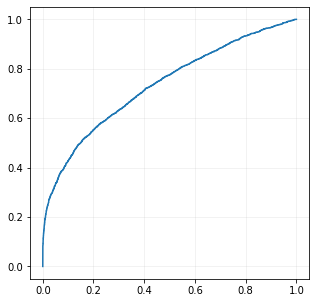

In [820]:

# Calculate ROC score and plot ROC characteristic
# --------------------------------------------------
def fit_ROC(clf_RF, X_test, y_test, ConditionName):
    y_proba = clf_RF.predict_proba(X_test)[:, 1]
    ROC_Score = roc_auc_score(y_test, y_proba)
    print('\n + \033[1m', ConditionName.upper(), '\033[0m')
    print('ROC Score: %0.2f' % ROC_Score)
    print('Accuracy: %0.2f' % accuracy_score(clf_RF.predict(X_test), y_test))
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)

    fig, ax = plt.subplots(figsize=(5,5))
    plt.plot(fpr, tpr)
    plt.grid('on', alpha=0.2)
# --------------------------------------------------

fit_ROC(clf_RF_Dementia_Optimised, X_test_Dementia, y_test_Dementia, 'Dementia')
# fit_ROC(clf_RF_Autism_Optimised, X_test_Autism, y_test_Autism, 'Autism')
# fit_ROC(clf_RF_Diabetes_Optimised, X_test_Diabetes, y_test_Diabetes, 'Diabetes')


## Feature importance: Permutation using rfpimp

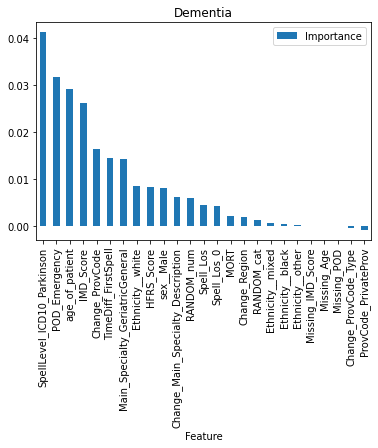

In [826]:

import import_ipynb
import rfpimp

def FeatureImportance_rfpimp(clf, X, y, ConditionName):
    I = rfpimp.permutation_importances(clf, X, y, rfpimp.oob_classifier_accuracy)
    
    I.plot.bar(rot='90', title=ConditionName);
    return I
    
FeatureImportance_rfpimp_Dementia = FeatureImportance_rfpimp(clf_RF_Dementia_Optimised,
                                                             X_test_Dementia, y_test_Dementia, 'Dementia')
    
    
# I_Autism = rfpimp.permutation_importances(clf_RF_Autism_Optimised, X_ini_Autism, y_ini_Autism, rfpimp.oob_classifier_accuracy)
# I_Diabetes = rfpimp.permutation_importances(clf_RF_Diabetes_Optimised, X_ini_Diabetes, y_ini_Diabetes, rfpimp.oob_classifier_accuracy)

# I_Autism.plot.bar(rot='90', title="Autism");
# I_Diabetes.plot.bar(rot='90', title="Diabetes");



SpellLevel_ICD10_Parkinson           4.696838e-02
POD_Emergency                        3.213512e-02
age_of_patient                       2.436120e-02
IMD_Score                            1.671719e-02
Change_ProvCode                      1.420528e-02
TimeDiff_FirstSpell                  1.377220e-02
sex__Male                            8.986574e-03
Main_Specialty_GeriatricGeneral      6.734517e-03
HFRS_Score                           5.500217e-03
Ethnicity__white                     5.348636e-03
Change_Main_Specialty_Description    5.023820e-03
Change_Region                        4.006063e-03
RANDOM_num                           2.013859e-03
MORT                                 1.364227e-03
Spell_Los                            1.320918e-03
Ethnicity__mixed                     3.248159e-04
Ethnicity__other                     2.598528e-04
Change_ProvCode_Type                 1.299264e-04
Missing_IMD_Score                    2.220446e-17
Missing_Age                          0.000000e+00


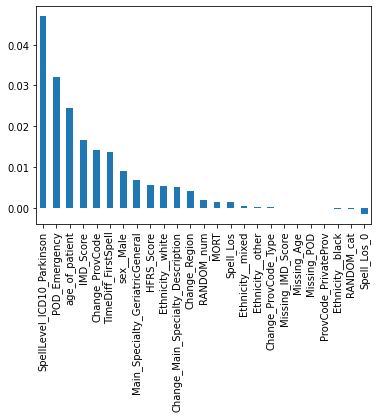

In [829]:
FeatureImportance_sklearn(clf_RF_Dementia_Optimised, X_test_Dementia, y_test_Dementia)

## Feature importance: Permutation using sklearn

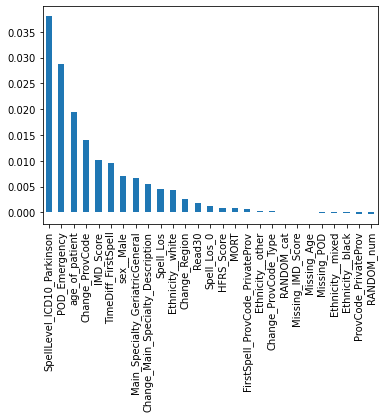

In [500]:

def FeatureImportance_sklearn(clf, X, y):
    I_Dementia = permutation_importance(clf, X, y)
    Features = X.columns
    FeatureImportance_Series = pd.Series(I_Dementia['importances_mean'], index=Features).sort_values(ascending=False)
    
    FeatureImportance_Series.plot.bar()
    return FeatureImportance_Series

FeatureImportance_sklearn_Dementia = FeatureImportance_sklearn(clf_RF_Dementia_Optimised, X_test_Dementia, y_test_Dementia)


In [828]:
FeatureImportance_sklearn_Dementia.iloc[0:]

SpellLevel_ICD10_Parkinson           0.038003
POD_Emergency                        0.028735
age_of_patient                       0.019446
Change_ProvCode                      0.014097
IMD_Score                            0.010069
TimeDiff_FirstSpell                  0.009528
sex__Male                            0.006994
Main_Specialty_GeriatricGeneral      0.006583
Change_Main_Specialty_Description    0.005457
Spell_Los                            0.004461
Ethnicity__white                     0.004439
Change_Region                        0.002555
Read30                               0.001819
Spell_Los_0                          0.001299
HFRS_Score                           0.000845
MORT                                 0.000000
FirstSpell_ProvCode_PrivateProv      0.000000
Ethnicity__other                     0.000238
Change_ProvCode_Type                 0.000195
RANDOM_cat                           0.000173
Missing_IMD_Score                    0.000108
Missing_Age                       

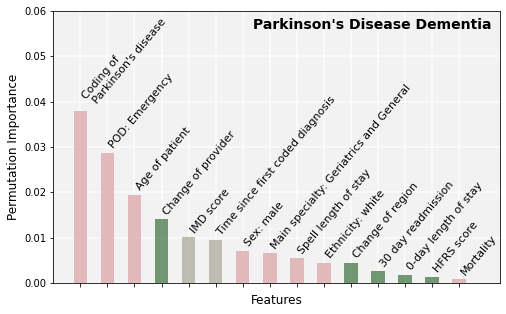

In [790]:

fig, ax = plt.subplots(figsize=(8,5))
df_FeatureImportance = pd.DataFrame({'Feature':FeatureImportance_sklearn_Dementia.index,
                                     'Importance':FeatureImportance_sklearn_Dementia.values})

FeatureLabels_New = ["Coding of \n Parkinson's disease",
                     "POD: Emergency",
                     "Age of patient",
                     "Change of provider",
                     "IMD score",
                     "Time since first coded diagnosis",
                     "Sex: male",
                     "Main specialty: Geriatrics and General",
                     "Spell length of stay",
                     "Ethnicity: white",
                     "Change of region",
                     "30 day readmission",
                     "0-day length of stay",
                     "HFRS score",
                     "Mortality"]
# FeatureLabels = FeatureLabels_New + list(df_FeatureImportance.loc[:, 'Feature'].values)[len(FeatureLabels_New):]
FeatureLabels = FeatureLabels_New

for index, value in enumerate(FeatureLabels):
    plt.text(index, 0.001+df_FeatureImportance.loc[index, 'Importance'], str(value),
             rotation='50', weight='normal', size=11,
             zorder=2) #, color=ColorText

# Change colour depending on impact of each feature
Color1 = np.array([26/255, 90/255, 30/255, 0.6])
Color2 = np.concatenate( [np.array([251/255, 200/255, 202/255])*0.9, [0.9]] )
# Color3 = np.array([233/255, 230/255, 211/255])*0.98
Color3 = np.concatenate( [np.array([233/255, 230/255, 211/255])*0.8, [0.9]] )

Features_Negative = ["Coding of \n Parkinson's disease", "POD: Emergency", "Age of patient", "Spell length of stay",
                     "Main specialty: Geriatrics and General", "Sex: male",
                     "Ethnicity: white", "Mortality"]
Feature_Unsure = ["IMD score", "Time since first coded diagnosis"]
ColorList = [Color2 if (x in Features_Negative) else (Color3 if (x in Feature_Unsure) else Color1) for x in FeatureLabels_New]

FeatureImportance_sklearn_Dementia[0:len(FeatureLabels)].plot.bar(color=ColorList, zorder=2);

plt.grid('on', alpha=0.8, color=[1, 1, 1], linewidth=1.5)
ax.set_facecolor([0, 0, 0, 0.05])
# plt.grid('on', alpha=0.15, linewidth=1)
plt.ylim(0, 0.06)
plt.xlim(-1, 15.5)
ax.set_xticklabels([]);
plt.xlabel('Features', size=12);
plt.ylabel('Permutation Importance', size=12);
# plt.title("Parkinson's Disease Dementia", size=14, fontweight='bold', loc='right');
plt.text(10.8, 0.056, "Parkinson's Disease Dementia",
         horizontalalignment='center',
         fontsize=14,  fontweight='bold')

SaveFig = False
if SaveFig:
    plt.savefig(r'O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Figures\Dementia_PermutationImportance_21.12.06.png',
               bbox_inches='tight', format='png', dpi=300)


## Feature importance: Drop importance

In [498]:

from sklearn.base import clone 

def dropcol_importances(rf, X_train, y_train, X_val, y_val):
    rf_ = clone(rf)
    rf_.random_state = 999
    rf_.fit(X_train, y_train)
    score = accuracy_score(rf_.predict(X_val), y_val)
    baseline = score
    imp = []
    for idx, col in enumerate(X_train.columns):
        print('%0.2f' % (100*(idx+1)/X_train.shape[1]) ,'%', ': Dropping', col, '...')
        X = X_train.drop(col, axis=1)
        Xdrop_val = X_val.drop(col, axis=1)
        rf_ = clone(rf)
        rf_.random_state = 999
        rf_.fit(X, y_train)
        score_drop = accuracy_score(rf_.predict(Xdrop_val), y_val)
        imp.append(baseline - score_drop)
    imp = np.array(imp)
    I = pd.DataFrame(
            data={'Feature':X_train.columns,
                  'Importance':imp})
    I = I.set_index('Feature')
    I = I.sort_values('Importance', ascending=False)
    return I

# I_Drop = dropcol_importances(clf_RF_Dementia_Optimised, X_train_Dementia, y_train_Dementia, X_test_Dementia, y_test_Dementia)
# I_Drop


3.70 % : Dropping age_of_patient ...
7.41 % : Dropping Spell_Los ...
11.11 % : Dropping Spell_Los_0 ...
14.81 % : Dropping MORT ...
18.52 % : Dropping Read30 ...
22.22 % : Dropping POD_Emergency ...
25.93 % : Dropping FirstSpell_ProvCode_PrivateProv ...
29.63 % : Dropping ProvCode_PrivateProv ...
33.33 % : Dropping Change_ProvCode ...
37.04 % : Dropping Change_ProvCode_Type ...
40.74 % : Dropping Change_Region ...
44.44 % : Dropping Change_Main_Specialty_Description ...
48.15 % : Dropping Missing_Age ...
51.85 % : Dropping Missing_IMD_Score ...
55.56 % : Dropping Missing_POD ...
59.26 % : Dropping HFRS_Score ...
62.96 % : Dropping IMD_Score ...
66.67 % : Dropping TimeDiff_FirstSpell ...
70.37 % : Dropping sex__Male ...
74.07 % : Dropping Ethnicity__black ...
77.78 % : Dropping Ethnicity__mixed ...
81.48 % : Dropping Ethnicity__other ...
85.19 % : Dropping Ethnicity__white ...
88.89 % : Dropping Main_Specialty_GeriatricGeneral ...
92.59 % : Dropping SpellLevel_ICD10_Parkinson ...
96.30 

## Shapley values for most important features

In [514]:


def MostImportantFeatures(I, Threshold):
    df_FeatureImportance = pd.DataFrame({'Features':I.index,
                                         'Importance':I.values})
    
    MaxImportance = df_FeatureImportance.loc[:, 'Importance'].max()
    ThresholdVal = Threshold * MaxImportance
    Filter_ImportantFeatures = df_FeatureImportance.loc[:, 'Importance'] >= ThresholdVal
    df_ImportantFeatures = df_FeatureImportance.loc[Filter_ImportantFeatures, :]
    ImportantFeatures_List = list(df_ImportantFeatures.loc[:, 'Features'].values)
    return ImportantFeatures_List

ImportantFeatures_Dementia = MostImportantFeatures(FeatureImportance_sklearn_Dementia, 0.01)
ImportantFeatures_Dementia


['SpellLevel_ICD10_Parkinson',
 'POD_Emergency',
 'age_of_patient',
 'Change_ProvCode',
 'IMD_Score',
 'TimeDiff_FirstSpell',
 'sex__Male',
 'Main_Specialty_GeriatricGeneral',
 'Change_Main_Specialty_Description',
 'Spell_Los',
 'Ethnicity__white',
 'Change_Region',
 'Read30',
 'Spell_Los_0',
 'HFRS_Score',
 'MORT',
 'FirstSpell_ProvCode_PrivateProv']

In [ ]:

import shap

# Create Tree Explainer object that can calculate shap values
def ComputeShapValues(clf, X_test):
    explainer = shap.TreeExplainer(clf, feature_perturbation='interventional')
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns)
    return shap_values

shap_values_Dementia = ComputeShapValues(clf_RF_Dementia_Optimised, X_test_Dementia)


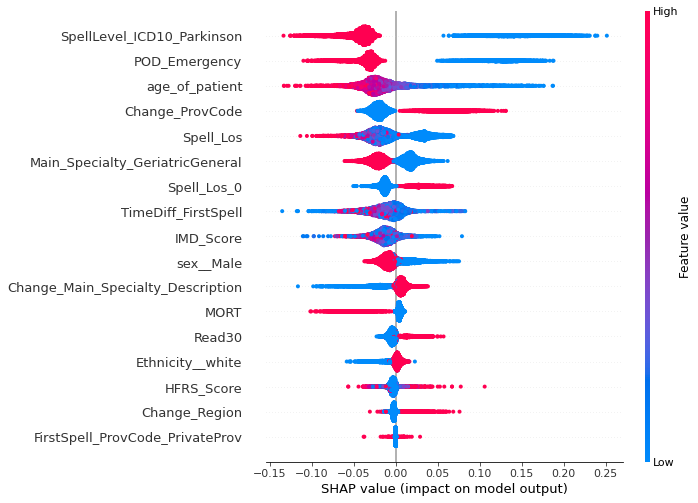

In [612]:

def ShapSummaryPlotImportantFeatures(shap_values, X_test, ImportantFeatures_List):
    Features_Number = range(1, len(X_test.columns)+1)
    df_Features = pd.DataFrame({'Feature':list(X_test.columns), 'Number':Features_Number})
    Filter = df_Features.loc[:, 'Feature'].isin(ImportantFeatures_List)
    ImportantFeatures_Number = list(df_Features.loc[Filter, 'Number'].values)
    ImportantFeatures_Number = [x-1 for x in ImportantFeatures_Number]

    shap.summary_plot(shap_values[1][:,ImportantFeatures_Number], X_test.iloc[:, ImportantFeatures_Number], show=False)

ShapSummaryPlotImportantFeatures(shap_values, X_test_Dementia, ImportantFeatures_Dementia)    

plt.savefig(r'O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Figures\Dementia_ShapValues_21.11.25.png',
           bbox_inches='tight', format='png', dpi=300)


## Dependent plots for specific continuous variables

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

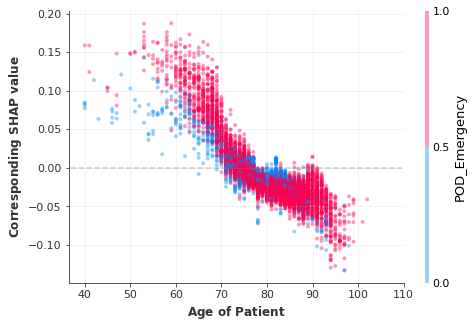

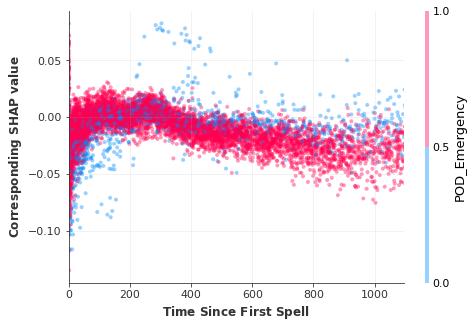

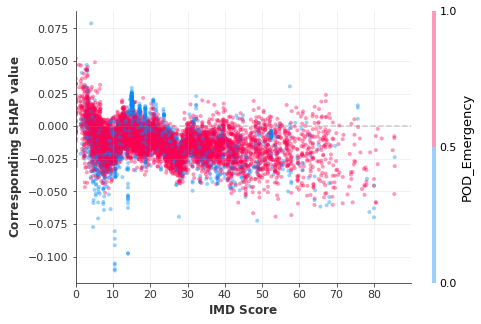

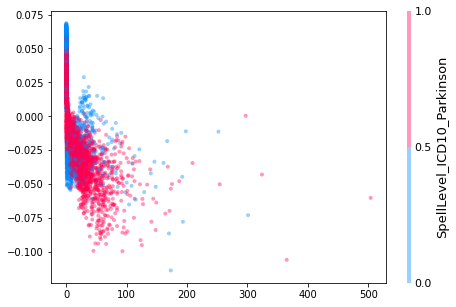

In [616]:

SaveFigures = True

# ---------------------- 
# Age
shap.dependence_plot('age_of_patient', shap_values[1], X_test_Dementia, xmax=110, alpha=0.4, show=False)
fig = plt.gcf()
ax = plt.gca()
ax.set_xlabel('$\\bf{Age \ of \ Patient}$', fontsize=12)
ax.set_ylabel('$\\bf{Corresponding \ SHAP \ value}$', fontsize=12)
plt.grid('on', alpha=0.2)

# Plotting x_axis
X = np.linspace(0, 110, 20)
Y = Y=[0 for x in X]
ax.plot(X, Y, color='black', alpha=0.2, linestyle='--', zorder=0)

if SaveFigures:
    plt.savefig(r'O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Figures\Dementia_ShapValues_Age_21.11.25.png',
               bbox_inches='tight', format='png', dpi=300)


# ---------------------- 
# TimeDiff
shap.dependence_plot('TimeDiff_FirstSpell', shap_values[1], X_test_Dementia, xmin=0, xmax=3*365, alpha=0.4, show=False)
fig = plt.gcf()
ax = plt.gca()
ax.set_xlabel('$\\bf{Time \ Since \ First \ Spell}$', fontsize=12)
ax.set_ylabel('$\\bf{Corresponding \ SHAP \ value}$', fontsize=12)
plt.grid('on', alpha=0.2)

# Plotting x_axis
X = np.linspace(0, 110, 20)
Y = Y=[0 for x in X]
ax.plot(X, Y, color='black', alpha=0.2, linestyle='--', zorder=0)

if SaveFigures:
    plt.savefig(r'O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Figures\Dementia_ShapValues_TimeDiff_21.11.25.png',
           bbox_inches='tight', format='png', dpi=300)


# ---------------------- 
# IMD Score

shap.dependence_plot('IMD_Score', shap_values[1], X_test_Dementia, xmin=0, alpha=0.4, show=False)
fig = plt.gcf()
ax = plt.gca()
ax.set_xlabel('$\\bf{IMD \ Score}$', fontsize=12)
ax.set_ylabel('$\\bf{Corresponding \ SHAP \ value}$', fontsize=12)
plt.grid('on', alpha=0.2)

# Plotting x_axis
X = np.linspace(0, 110, 20)
Y = Y=[0 for x in X]
ax.plot(X, Y, color='black', alpha=0.2, linestyle='--', zorder=0)

if SaveFigures:
    plt.savefig(r'O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Figures\Dementia_ShapValues_IMDScore_21.11.25.png',
           bbox_inches='tight', format='png', dpi=300)





Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


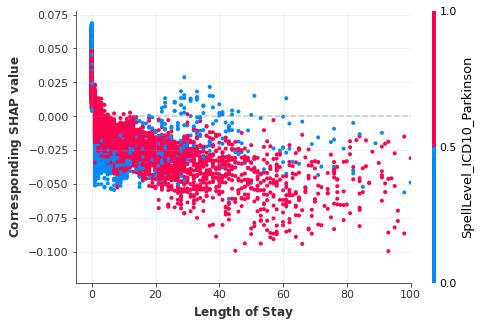

In [627]:

SaveFigures = True

shap.dependence_plot('Spell_Los', shap_values[1], X_test_Dementia, xmax=100, show=False)
fig = plt.gcf()
ax = plt.gca()
ax.set_xlabel('$\\bf{Length \ of \ Stay}$', fontsize=12)
ax.set_ylabel('$\\bf{Corresponding \ SHAP \ value}$', fontsize=12)
plt.grid('on', alpha=0.2)

# Plotting x_axis
X = np.linspace(0, 110, 20)
Y = Y=[0 for x in X]
ax.plot(X, Y, color='black', alpha=0.2, linestyle='--', zorder=0)


if SaveFigures:
    plt.savefig(r'O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Figures\Dementia_ShapValues_LOS_21.11.25.png',
           bbox_inches='tight', format='png', dpi=300)



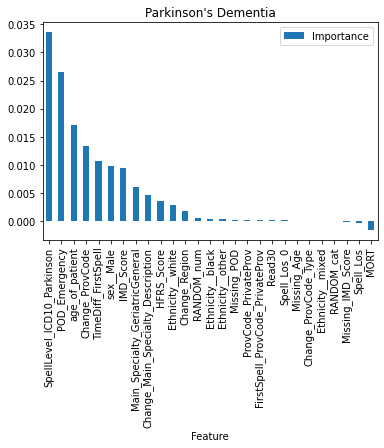

In [479]:

import import_ipynb
import rfpimp

I_Dementia = rfpimp.permutation_importances(clf_RF_Dementia_Optimised, X_test_Dementia, y_test_Dementia, rfpimp.oob_classifier_accuracy)
# I_Autism = rfpimp.permutation_importances(clf_RF_Autism_Optimised, X_ini_Autism, y_ini_Autism, rfpimp.oob_classifier_accuracy)
# I_Diabetes = rfpimp.permutation_importances(clf_RF_Diabetes_Optimised, X_ini_Diabetes, y_ini_Diabetes, rfpimp.oob_classifier_accuracy)

I_Dementia.plot.bar(rot='90', title="Parkinson's Dementia");
# I_Autism.plot.bar(rot='90', title="Autism");
# I_Diabetes.plot.bar(rot='90', title="Diabetes");



<AxesSubplot:>

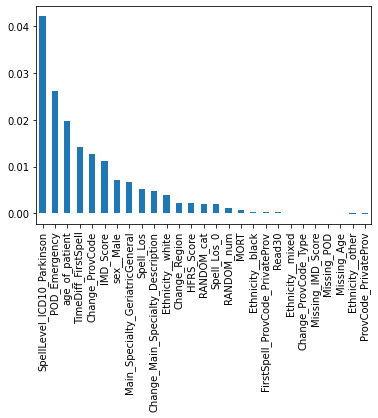

In [469]:

I_Dementia = permutation_importance(clf_RF_Dementia_Optimised, X_test_Dementia, y_test_Dementia)
Features = X_test_Dementia.columns
FeatureImportance = pd.DataFrame({'Features':Features, 'Permutation Importance':I_Dementia['importances_mean']} )
FeatureImportance = FeatureImportance.sort_values(by=['Permutation Importance'], ascending=False)
FeatureImportance_Series = pd.Series(I_Dementia['importances_mean'], index=Features).sort_values(ascending=False)
FeatureImportance_Series.plot.bar()


In [445]:

MaxImportance = I_Dementia.loc[:, 'Importance'].max()
Threshold = 0.01 * MaxImportance
Filter_ImportantFeatures = I_Dementia.loc[:, 'Importance'] >= Threshold
ImportantFeatures = I_Dementia.loc[Filter_ImportantFeatures, :]
ImportantFeatures_List = list(ImportantFeatures.index)
ImportantFeatures_List


AttributeError: loc

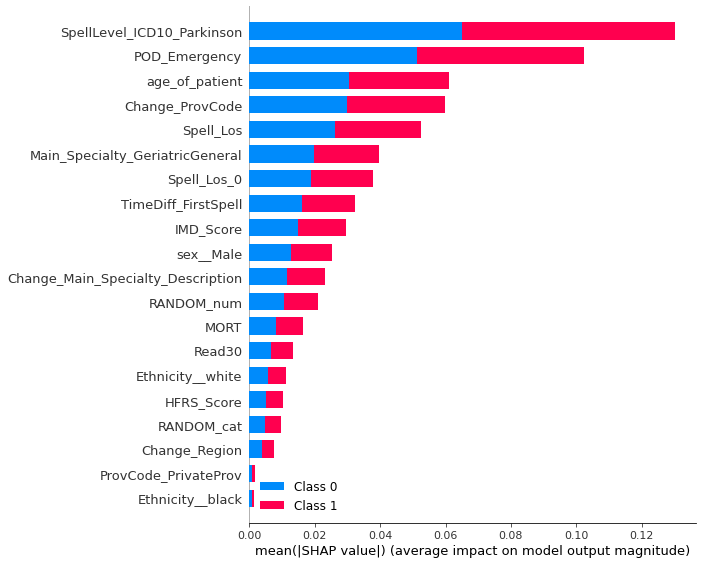

In [272]:

import shap

# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(clf_RF_Dementia_Optimised, feature_perturbation='tree_path_dependent')
shap_values = explainer.shap_values(X_test_Dementia)
shap.summary_plot(shap_values, features=X_test_Dementia, feature_names=X_test_Dementia.columns)


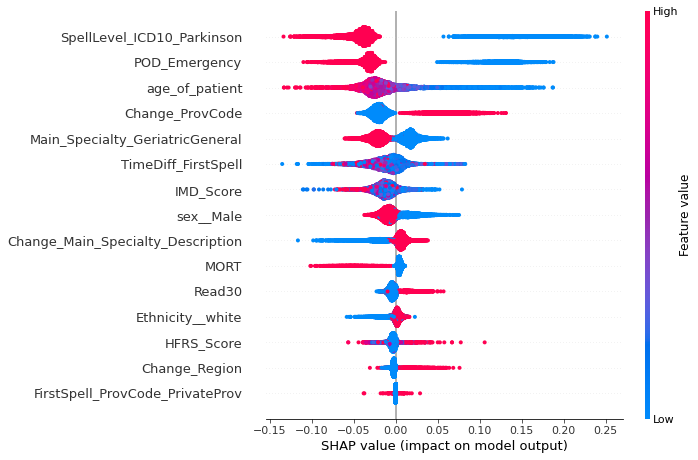

In [434]:


# shap.summary_plot(shap_values[1], features=X_test_Dementia, feature_names=X_test_Dementia.columns)

Features_Number = range(1, len(X_test_Dementia.columns)+1)
df_Features = pd.DataFrame({'Feature':list(X_test_Dementia.columns), 'Number':Features_Number})
Filter = df_Features.loc[:, 'Feature'].isin(ImportantFeatures_List)
ImportantFeatures_Number = list(df_Features.loc[Filter, 'Number'].values)
ImportantFeatures_Number = [x-1 for x in ImportantFeatures_Number]

shap.summary_plot(shap_values[1][:,ImportantFeatures_Number], X_test_Dementia.iloc[:, ImportantFeatures_Number])


Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


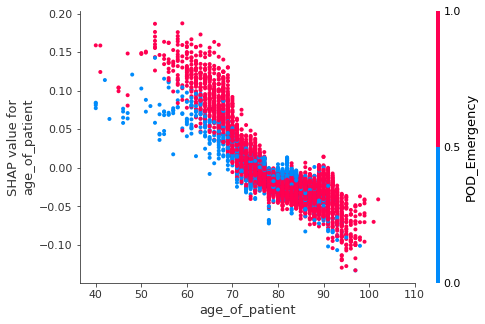

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


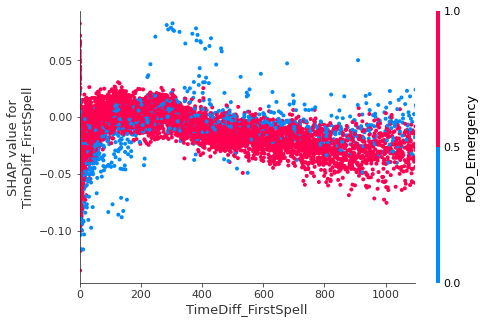

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


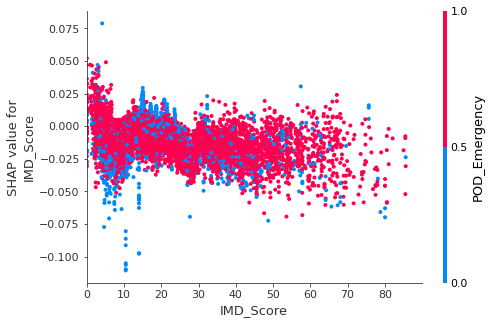

In [435]:

shap.dependence_plot('age_of_patient', shap_values[1], X_test_Dementia, xmax=110)
shap.dependence_plot('TimeDiff_FirstSpell', shap_values[1], X_test_Dementia, xmin=0, xmax=3*365)
shap.dependence_plot('IMD_Score', shap_values[1], X_test_Dementia, xmin=0)


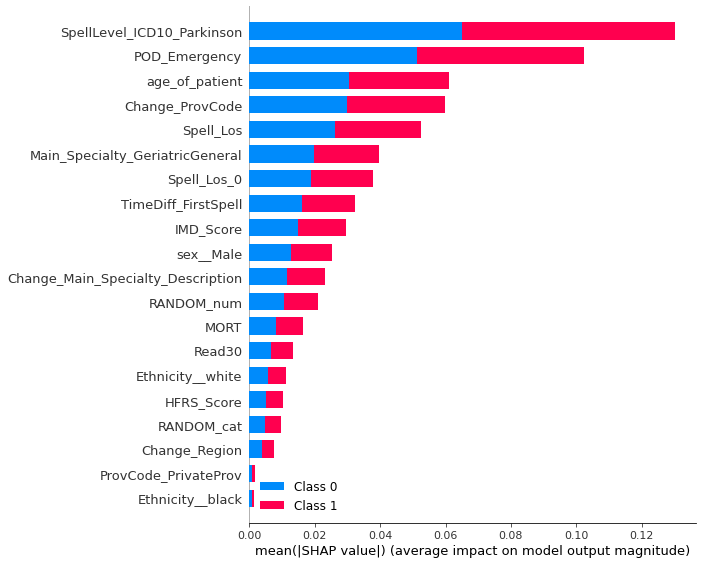

In [275]:

import shap

# Create Tree Explainer object that can calculate shap values
explainer_Interventional = shap.TreeExplainer(clf_RF_Dementia_Optimised, feature_perturbation='interventional')
shap_values_Interventional = explainer_Interventional.shap_values(X_test_Dementia)
shap_values_Interventional.summary_plot(shap_values_Interventional, features=X_test_Dementia, feature_names=X_test_Dementia.columns)



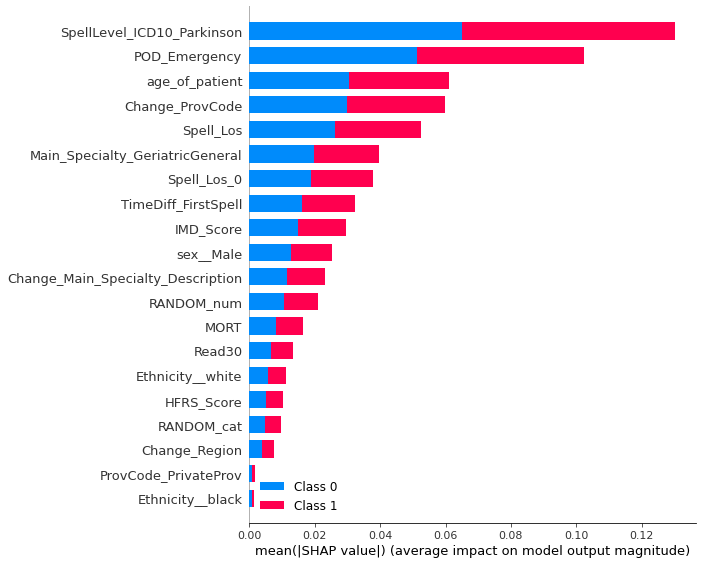

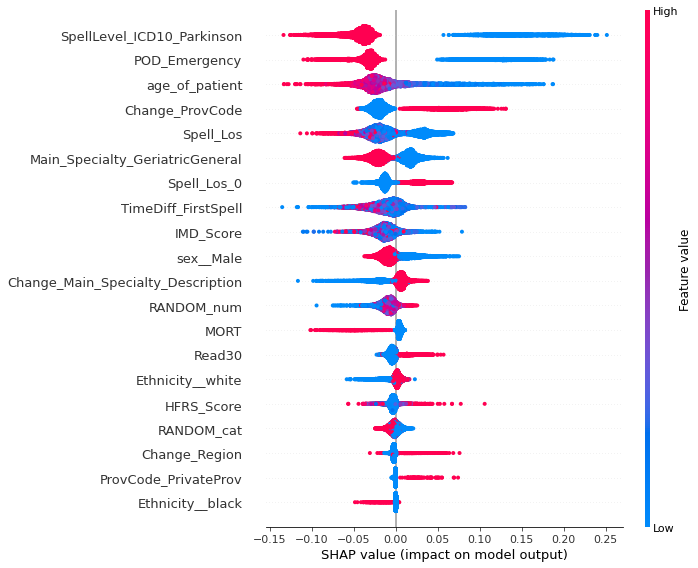

In [277]:

shap.summary_plot(shap_values_Interventional, features=X_test_Dementia, feature_names=X_test_Dementia.columns)
shap.summary_plot(shap_values_Interventional[1], features=X_test_Dementia, feature_names=X_test_Dementia.columns)



Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


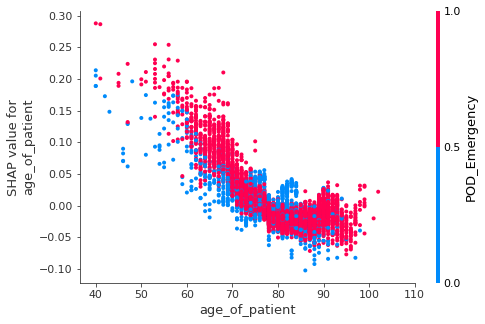

In [81]:

shap.dependence_plot('age_of_patient', shap_values[1], X_test_Dementia, xmax=110)


Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


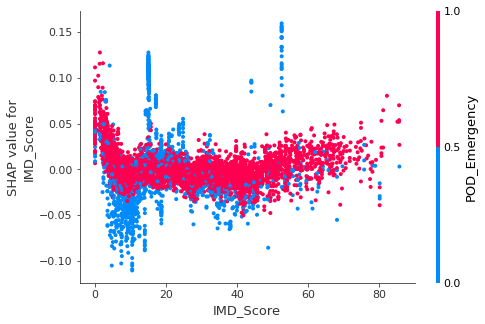

In [95]:

shap.dependence_plot('IMD_Score', shap_values[1], X_test_Dementia)


In [216]:
from acv_explainers.utils import *


ModuleNotFoundError: No module named 'acv_explainers'